## End-to-End

In [1]:
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa21_male2.csv')
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


The first question i wanted to answer was, how the value maybe rises and decreases by the age. Therefore i had to clean the Value Column because there were many different Values and Signs like the '€' 'K' and 'M'. At the first place show all the unique values for getting an image of the shape of the values

In [3]:
df["Value"].unique()

array(['€625K', '€600K', '€1.1M', '€0', '€5.5M', '€725K', '€2.8M', '€1K',
       '€400K', '€120K', '€500K', '€190K', '€2.2M', '€350K', '€1.3M',
       '€1.5M', '€275K', '€325K', '€900K', '€80K', '€3M', '€35K', '€975K',
       '€425K', '€850K', '€45K', '€3.2M', '€1.2M', '€50K', '€825K',
       '€130K', '€1.8M', '€575K', '€2.1M', '€1.6M', '€375K', '€2.7M',
       '€550K', '€1.7M', '€3.4M', '€150K', '€300K', '€4.2M', '€5M',
       '€1.9M', '€6.5M', '€875K', '€15.5M', '€210K', '€450K', '€1M',
       '€775K', '€1.4M', '€100K', '€240K', '€650K', '€950K', '€6M',
       '€3.9M', '€46M', '€30K', '€2.5M', '€4.1M', '€15K', '€7.5M',
       '€4.3M', '€25K', '€9.5M', '€3.1M', '€90K', '€2.4M', '€675K',
       '€475K', '€2.3M', '€925K', '€4.7M', '€4.5M', '€230K', '€2M',
       '€70K', '€7M', '€170K', '€250K', '€220K', '€2.6M', '€2.9M',
       '€180K', '€8.5M', '€140K', '€3K', '€10K', '€200K', '€13M', '€750K',
       '€3.7M', '€110K', '€700K', '€3.6M', '€29.5M', '€3.5M', '€3.8M',
       '€16.5M', '€800

Now i do the cleaning (a bit complicated but worked :D) and put it to integer. 

In [4]:
df['Value'] = df['Value'].replace('\u20AC','',regex=True).str.replace('K', '000').str.replace('.1M', '100000').str.replace('.2M', '200000').str.replace('.3M', '300000').str.replace('.4M', '400000').str.replace('.5M', '500000').str.replace('.6M', '600000').str.replace('.7M', '700000').str.replace('.8M', '800000').str.replace('.9M', '900000').str.replace('M', '000000')
df["Value"] = df["Value"] = pd.to_numeric(df["Value"]).astype(int)
df["Value"].unique()

array([   625000,    600000,   1100000,         0,   5500000,    725000,
         2800000,      1000,    400000,    120000,    500000,    190000,
         2200000,    350000,   1300000,   1500000,    275000,    325000,
          900000,     80000,   3000000,     35000,    975000,    425000,
          850000,     45000,   3200000,   1200000,     50000,    825000,
          130000,   1800000,    575000,   2100000,   1600000,    375000,
         2700000,    550000,   1700000,   3400000,    150000,    300000,
         4200000,   5000000,   1900000,   6500000,    875000,  15500000,
          210000,    450000,   1000000,    775000,   1400000,    100000,
          240000,    650000,    950000,   6000000,   3900000,     30000,
         2500000,   4100000,     15000,   7500000,   4300000,     25000,
         9500000,   3100000,     90000,   2400000,    675000,    475000,
         2300000,    925000,   4700000,   4500000,    230000,   2000000,
           70000,   7000000,    170000,    250000, 

Now i filter age and values and plot them in a Lineplot which shows not absolute but relative values but gives you an impression that players have there highest value with the Age in the middle of 25 to 30 years. 

<AxesSubplot:xlabel='Age', ylabel='Value'>

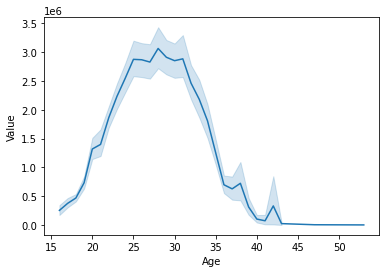

In [5]:
fifa_age_vs_value = df[['Age', 'Value']]
sns.lineplot(data=fifa_age_vs_value, x="Age", y="Value") 

Second part of my analysis was the question if you can predict the goals (which i suggested to be the Hits but at the end it wasnt) by selecting certain (attacking) features. Again i began with cleaning the 'Hits' Column because there were some 'K's in it. Then i changed it too numerical as well. 

In [6]:
df['Hits'] = df['Hits'].str.replace('K', '')
df["Hits"] = pd.to_numeric(df["Hits"])

Checking if Hits is numerical now.

In [8]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    ID                int64  
 1    Name              object 
 2    Age               int64  
 3    OVA               int64  
 4    Nationality       object 
 5    Club              object 
 6    BOV               int64  
 7    BP                object 
 8    Position          object 
 9    Player Photo      object 
 10   Club Logo         object 
 11   Flag Photo        object 
 12   POT               int64  
 13   Team & Contract   object 
 14   Height            object 
 15   Weight            object 
 16   foot              object 
 17   Growth            int64  
 18   Joined            object 
 19   Loan Date End     object 
 20   Value             int32  
 21   Wage              object 
 22   Release Clause    object 
 23   Contract          object 
 24   Attacking         int64  
 25   Crossing          in

In [9]:
df.describe()

,ID,Age,OVA,BOV,POT,Growth,Value,Attacking,Crossing,Finishing,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,16384.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,2.098898e+06,258.537752,51.621314,47.956672,...,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715,29.591449
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,4.209950e+06,72.255687,17.875715,19.391547,...,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260,78.177995
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,0.000000e+00,33.000000,6.000000,3.000000,...,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000,1.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,3.500000e+05,232.000000,41.000000,33.000000,...,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,4.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,7.500000e+05,271.000000,56.000000,52.000000,...,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000,7.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,2.100000e+06,306.000000,65.000000,64.000000,...,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000,19.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,1.055000e+08,437.000000,94.000000,95.000000,...,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000,974.000000


Now i filtered my features which i believed to be the most accurate one for my model.

In [10]:
data_fifa = df[["Finishing", "Heading Accuracy", "Volleys", "Shot Power", "Jumping", "Dribbling", "Ball Control", "Acceleration", "Sprint Speed", "Long Shots", "Vision", "Hits"]]
data_fifa

,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
0,50,59,58.0,74,68.0,73,71,68,74,68,66.0,4.0
1,64,61,68.0,75,54.0,69,71,56,50,71,73.0,4.0
2,64,41,75.0,72,58.0,79,78,48,42,69,74.0,11.0
3,70,60,NaN,63,NaN,68,77,59,62,59,NaN,3.0
4,69,54,79.0,67,40.0,85,90,61,56,70,93.0,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,23,66,26.0,48,70.0,44,56,52,55,28,29.0,NaN
17121,43,50,41.0,51,62.0,57,54,61,63,48,53.0,NaN
17122,34,53,34.0,28,61.0,52,47,66,61,37,45.0,NaN
17123,26,52,23.0,51,72.0,55,57,72,70,33,56.0,NaN


Dropping the Nones because ohterwise i would have to adjust the regression Model itself and they are not that much.  

In [11]:
data_fifa = data_fifa.dropna()
data_fifa

,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
0,50,59,58.0,74,68.0,73,71,68,74,68,66.0,4.0
1,64,61,68.0,75,54.0,69,71,56,50,71,73.0,4.0
2,64,41,75.0,72,58.0,79,78,48,42,69,74.0,11.0
4,69,54,79.0,67,40.0,85,90,61,56,70,93.0,149.0
5,53,42,57.0,71,70.0,67,62,90,91,49,58.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16379,43,33,38.0,50,40.0,67,55,78,73,34,40.0,5.0
16380,22,56,30.0,51,68.0,30,34,55,55,27,30.0,3.0
16381,71,62,67.0,60,66.0,68,66,83,78,66,60.0,291.0
16382,35,46,37.0,48,57.0,56,56,64,64,39,48.0,4.0


Then i check the correlations and recognized the first time that no value has a high correlation to my goals which surprised me. 

In [12]:
corr_data = data_fifa.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix

,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
Finishing,1.000000,0.274572,0.870916,0.741093,0.040753,0.764469,0.721050,0.494588,0.471799,0.840038,0.662817,0.219529
Heading Accuracy,0.274572,1.000000,0.303080,0.338855,0.440424,0.177703,0.314823,-0.040534,0.049860,0.288675,0.112419,0.166079
Volleys,0.870916,0.303080,1.000000,0.779044,0.064012,0.757341,0.740226,0.441566,0.412941,0.844858,0.683955,0.205898
Shot Power,0.741093,0.338855,0.779044,1.000000,0.124363,0.687042,0.717164,0.307457,0.303822,0.844528,0.676450,0.272481
Jumping,0.040753,0.440424,0.064012,0.124363,1.000000,0.037642,0.104046,0.082513,0.122769,0.075537,0.004072,0.099939
Dribbling,0.764469,0.177703,0.757341,0.687042,0.037642,1.000000,0.901688,0.630341,0.579884,0.786164,0.774622,0.352869
Ball Control,0.721050,0.314823,0.740226,0.717164,0.104046,0.901688,1.000000,0.478324,0.438662,0.792050,0.797062,0.381454
Acceleration,0.494588,-0.040534,0.441566,0.307457,0.082513,0.630341,0.478324,1.000000,0.907547,0.424339,0.371183,0.201419
Sprint Speed,0.471799,0.049860,0.412941,0.303822,0.122769,0.579884,0.438662,0.907547,1.000000,0.391470,0.316474,0.202361
Long Shots,0.840038,0.288675,0.844858,0.844528,0.075537,0.786164,0.792050,0.424339,0.391470,1.000000,0.756540,0.228501


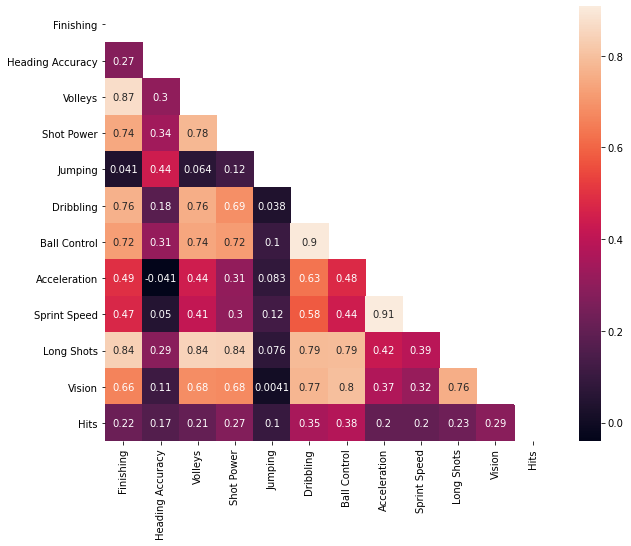

In [13]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

Then i trained and fit my model und the result didnt seem to be good so i thought about improvin the model. 

In [14]:
X = data_fifa.drop(['Hits'], axis=1)
y = data_fifa['Hits']


X = sm.add_constant(X)

model = sm.OLS(y,X,missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Hits   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     140.3
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          6.78e-310
Time:                        11:32:49   Log-Likelihood:                -93618.
No. Observations:               16326   AIC:                         1.873e+05
Df Residuals:                   16314   BIC:                         1.874e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -135.4043      5.202    -26.028      0.000    -145.601    -125.207
Finishing           -0.0502      0.079     -0.637      0.524      -0.205       0.104
Heading Accuracy     0.0594      0.058      1.032      0.302      -0.053       0.172
Volleys             -0.2816      0.082     -3.448      0.001      -0.442      -0.122
Shot Power           1.2479      0.081     15.474      0.000       1.090       1.406
Jumping              0.1257      0.056      2.239      0.025       0.016       0.236
Dribbling           -0.0735      0.121     -0.607      0.544      -0.311       0.164
Ball Control         0.9854      0.131      7.501      0.000       0.728       1.243
Acceleration         0.0976      0.116      0.843      0.399      -0.129       0.325
Sprint Speed         0.4635      0.110      4.217      0.000       0.248       0.679
Long Shots          -1.3082      0.090    -14.552      0.000      -1.484      -1.132
Vision               1.1848      0.077     15.431      0.000       1.034       1.335
==============================================================================
Omnibus:                    18002.662   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1408648.563
Skew:                           5.758   Prob(JB):                         0.00
Kurtosis:                      47.025   Cond. No.                     1.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In our result we can see tha the R-squared value only explain the 8,6% of a variation in the dependet variable.

In [15]:
X = data_fifa.drop(['Hits'], axis=1)
y = data_fifa['Hits']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.09
RMSE: 74.8392651289874
MAE: 36.01341933623043


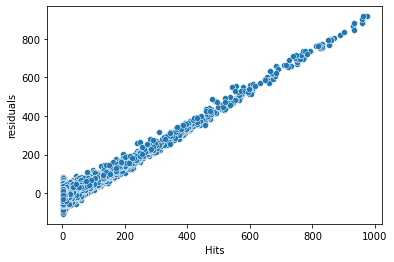

In [16]:
residuals = y - predictions

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='Hits', ylabel='residuals')
plt.show()

<AxesSubplot:xlabel='Hits'>

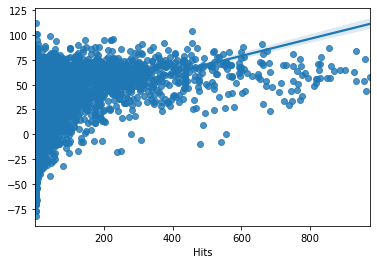

In [17]:
sns.regplot(y, predictions)

I insert a column years played which is basically the age minus 16 because the youngest player in the set is 16 and so i assumed (which is more and more the case) that a professionnel football career (especially a good one) starts early with 16. If i would set my border at 18 and would have players under 18 in my table i would have get negative values hich might be bad for my model.

In [18]:
df.insert(2, "Years Played", df['Age']-16, True)
df

,ID,Name,Years Played,Age,OVA,Nationality,Club,BOV,BP,Position,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,17,33,69,Italy,Udinese,71,LWB,LM,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,21,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,17,33,71,England,Coventry City,71,CAM,CAM RM RW LM,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,20,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,20,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,6,22,64,France,CD Tondela,66,CB,CB,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,2,18,56,Wales,Burnley,58,CAM,CAM CM,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,2,18,56,England,Burnley,56,RB,RB,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,4,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [19]:
data_fifa1 = df[['BP','Years Played', "Finishing", "Heading Accuracy", "Volleys", "Shot Power", "Jumping", "Dribbling", "Ball Control", "Acceleration", "Sprint Speed", "Long Shots", "Vision", "Hits"]]
data_fifa1

,BP,Years Played,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
0,LWB,17,50,59,58.0,74,68.0,73,71,68,74,68,66.0,4.0
1,CM,21,64,61,68.0,75,54.0,69,71,56,50,71,73.0,4.0
2,CAM,17,64,41,75.0,72,58.0,79,78,48,42,69,74.0,11.0
3,ST,20,70,60,NaN,63,NaN,68,77,59,62,59,NaN,3.0
4,CAM,20,69,54,79.0,67,40.0,85,90,61,56,70,93.0,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,CB,6,23,66,26.0,48,70.0,44,56,52,55,28,29.0,NaN
17121,CAM,2,43,50,41.0,51,62.0,57,54,61,63,48,53.0,NaN
17122,RB,2,34,53,34.0,28,61.0,52,47,66,61,37,45.0,NaN
17123,RB,4,26,52,23.0,51,72.0,55,57,72,70,33,56.0,NaN


I also filtered for attacking players and midfielders because i wanted to keep an eye on my goals and attacking players more often score them. 

In [20]:
data_fifa1['BP'].unique()

array(['LWB', 'CM', 'CAM', 'ST', 'RW', 'CB', 'CF', 'GK', 'CDM', 'RWB',
       'LB', 'LM', 'RM', 'RB', 'LW'], dtype=object)

In [21]:
excl_pos = ['LWB','CB','GK','RWB','LB','RB']
data_fifa1 = data_fifa1[~data_fifa1['BP'].isin(excl_pos)]
data_fifa1

,BP,Years Played,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
1,CM,21,64,61,68.0,75,54.0,69,71,56,50,71,73.0,4.0
2,CAM,17,64,41,75.0,72,58.0,79,78,48,42,69,74.0,11.0
3,ST,20,70,60,NaN,63,NaN,68,77,59,62,59,NaN,3.0
4,CAM,20,69,54,79.0,67,40.0,85,90,61,56,70,93.0,149.0
5,RW,11,53,42,57.0,71,70.0,67,62,90,91,49,58.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,CAM,1,38,46,34.0,55,56.0,50,53,63,65,41,47.0,NaN
17117,RM,2,45,40,44.0,47,62.0,63,65,77,73,37,57.0,NaN
17118,ST,3,55,52,43.0,53,67.0,50,52,66,67,48,45.0,NaN
17121,CAM,2,43,50,41.0,51,62.0,57,54,61,63,48,53.0,NaN


In [22]:
data_fifa1 = data_fifa1.dropna()
data_fifa1 = data_fifa1.drop(['BP'], axis=1)
data_fifa1

,Years Played,Finishing,Heading Accuracy,Volleys,Shot Power,Jumping,Dribbling,Ball Control,Acceleration,Sprint Speed,Long Shots,Vision,Hits
1,21,64,61,68.0,75,54.0,69,71,56,50,71,73.0,4.0
2,17,64,41,75.0,72,58.0,79,78,48,42,69,74.0,11.0
4,20,69,54,79.0,67,40.0,85,90,61,56,70,93.0,149.0
5,11,53,42,57.0,71,70.0,67,62,90,91,49,58.0,7.0
6,22,66,43,69.0,77,72.0,77,81,54,36,76,85.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,3,65,58,64.0,67,59.0,68,69,79,77,64,58.0,188.0
16376,1,48,34,42.0,59,56.0,61,55,67,67,40,52.0,3.0
16379,1,43,33,38.0,50,40.0,67,55,78,73,34,40.0,5.0
16381,2,71,62,67.0,60,66.0,68,66,83,78,66,60.0,291.0


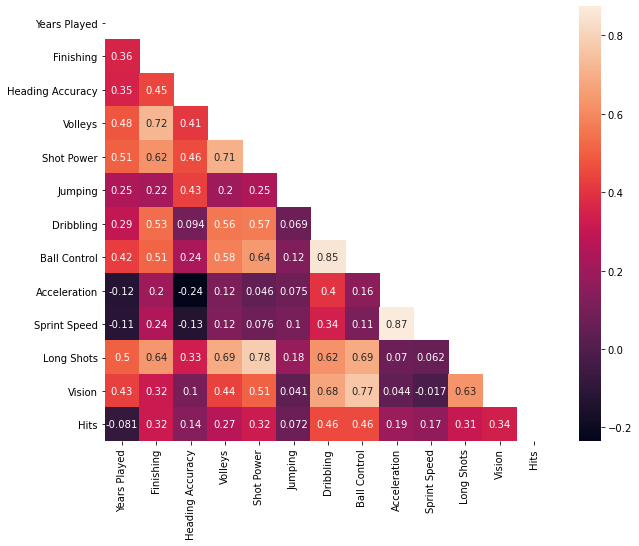

In [23]:
corr_data1 = data_fifa1.select_dtypes([np.number])
correlations_matrix1 = corr_data1.corr(method='spearman')
mask = np.zeros_like(correlations_matrix1)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix1, mask=mask, annot=True)
plt.show()

In [24]:
X = data_fifa1.drop(['Hits'], axis=1)
y = data_fifa1['Hits']


X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Hits   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     252.7
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:32:55   Log-Likelihood:                -54375.
No. Observations:                9504   AIC:                         1.088e+05
Df Residuals:                    9491   BIC:                         1.089e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -362.8945      9.294    -39.045      0.000    -381.113    -344.676
Years Played        -6.2778      0.204    -30.762      0.000      -6.678      -5.878
Finishing            0.6678      0.115      5.784      0.000       0.442       0.894
Heading Accuracy     0.6358      0.089      7.165      0.000       0.462       0.810
Volleys              0.0600      0.109      0.549      0.583      -0.154       0.274
Shot Power           0.4937      0.144      3.417      0.001       0.210       0.777
Jumping              0.0750      0.073      1.027      0.304      -0.068       0.218
Dribbling           -0.0710      0.224     -0.317      0.752      -0.511       0.369
Ball Control         3.4541      0.246     14.032      0.000       2.972       3.937
Acceleration         0.2510      0.159      1.576      0.115      -0.061       0.563
Sprint Speed         0.2326      0.151      1.544      0.123      -0.063       0.528
Long Shots          -0.2903      0.133     -2.185      0.029      -0.551      -0.030
Vision               1.4348      0.136     10.528      0.000       1.168       1.702
==============================================================================
Omnibus:                     9797.955   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           644709.499
Skew:                           5.163   Prob(JB):                         0.00
Kurtosis:                      42.006   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X = data_fifa1.drop(['Hits'], axis=1)
y = data_fifa1['Hits']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.24
RMSE: 73.87404900679023
MAE: 38.51093567741648


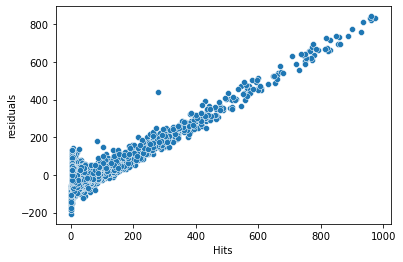

In [26]:
residuals = y - predictions

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='Hits', ylabel='residuals')
plt.show()

Then i did the same steps as before and in the correlation matrix i recognized that my new value years played isnt correlating with hits at all, so i checked the hits column again and saw ( but more because i know many of the players ) that hits are spread all over positions, ages and qualities which makes no sense at all. 

Maybe, and this is just an idea, Hits is something like the clicks on a players profile om the website because the most interessting metrics like the Overall Rating, the potencial and the Value are correlating the most with hits as you can see below. At the end i did a wrong assumption by assuming that Hits are Goals and should have checked that before. 

But if its the Hits on the Players Profile for example you could ask a new Business question on how much hits a Player would get on his profile regarding certain features. 


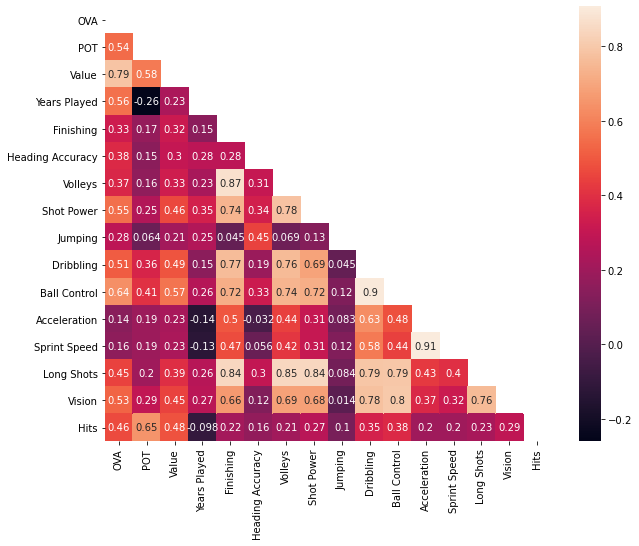

In [29]:
df1 = df[['OVA','POT','Value','BP','Years Played', "Finishing", "Heading Accuracy", "Volleys", "Shot Power", "Jumping", "Dribbling", "Ball Control", "Acceleration", "Sprint Speed", "Long Shots", "Vision", "Hits"]]
corr_data2 = df1.select_dtypes([np.number])
correlations_matrix2 = corr_data2.corr(method='spearman')
mask = np.zeros_like(correlations_matrix2)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix2, mask=mask, annot=True)
plt.show()